In [126]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import folium
import geopandas as gpd
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

Made the ID_LATITUDE_LONGITUDE_YEAR_WEEK column as the index as it contains unique values

In [67]:
#loading the train dataset
train_data = pd.read_csv("../dataset/CO2 Emmisions in Rawanda/train.csv", index_col='ID_LAT_LON_YEAR_WEEK')
train_data.head()

latitude  longitude  year  week_no  \
ID_LAT_LON_YEAR_WEEK                                           
ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

                          SulphurDioxide_SO2_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                 
ID_-0.510_29.290_2019_00                                 -0.000108   
ID_-0.510_29.290_2019_01                                  0.000021   
ID_-0.510_29.290_2019_02                                  0.000514   
ID_-0.510_29.290_2019_03                                       NaN   
ID_-0.510_29.290_2019_04                                 -0.000079   

                          SulphurDioxide_SO2_column_number_density_amf  \
ID_LAT_LON_YEAR_WEEK                                                     
ID_-0.510_29.290_2019_00                                      0.603019   
ID_-0.510_29.290_2019_01                                      0.728214   
ID_-0.510_29.290_2019_02                                      0.748199   
ID_-0.510_29.290_2019_03                                           NaN   
ID_-0.510_29.290_2019_04                                      0.676296   

                          SulphurDioxide_SO2_slant_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                       
ID_-0.510_29.290_2019_00                                       -0.000065   
ID_-0.510_29.290_2019_01                                        0.000014   
ID_-0.510_29.290_2019_02                                        0.000385   
ID_-0.510_29.290_2019_03                                             NaN   
ID_-0.510_29.290_2019_04                                       -0.000048   

                          SulphurDioxide_cloud_fraction  \
ID_LAT_LON_YEAR_WEEK                                      
ID_-0.510_29.290_2019_00                       0.255668   
ID_-0.510_29.290_2019_01                       0.130988   
ID_-0.510_29.290_2019_02                       0.110018   
ID_-0.510_29.290_2019_03                            NaN   
ID_-0.510_29.290_2019_04                       0.121164   

                          SulphurDioxide_sensor_azimuth_angle  \
ID_LAT_LON_YEAR_WEEK                                            
ID_-0.510_29.290_2019_00                           -98.593887   
ID_-0.510_29.290_2019_01                            16.592861   
ID_-0.510_29.290_2019_02                            72.795837   
ID_-0.510_29.290_2019_03                                  NaN   
ID_-0.510_29.290_2019_04                             4.121269   

                          SulphurDioxide_sensor_zenith_angle  ...  \
ID_LAT_LON_YEAR_WEEK                                          ...   
ID_-0.510_29.290_2019_00                           50.843559  ...   
ID_-0.510_29.290_2019_01                           39.137194  ...   
ID_-0.510_29.290_2019_02                           52.868816  ...   
ID_-0.510_29.290_2019_03                                 NaN  ...   
ID_-0.510_29.290_2019_04                           35.515587  ...   

                          Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
ID_LAT_LON_YEAR_WEEK                                                          
ID_-0.510_29.290_2019_00             3664.436218               61085.809570   
ID_-0.510_29.290_2019_01             3651.190311               66969.478735   
ID_-0.510_29.290_2019_02             4216.986492               60068.894448   
ID_-0.510_29.290_2019_03             5228.507736               51064.547339   
ID_-0.510_29.290_2019_04             3980.598120               63751.125781   

                          Cloud_cloud_base_height  Cloud_cloud_optical_depth  \
ID_LAT_LON_YEAR_WEEK                          

In [68]:
#loading the test dataset
test_data = pd.read_csv("../dataset/CO2 Emmisions in Rawanda/test.csv", index_col='ID_LAT_LON_YEAR_WEEK')
test_data.head()

latitude  longitude  year  week_no  \
ID_LAT_LON_YEAR_WEEK                                           
ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

                          SulphurDioxide_SO2_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                 
ID_-0.510_29.290_2022_00                                       NaN   
ID_-0.510_29.290_2022_01                                  0.000456   
ID_-0.510_29.290_2022_02                                  0.000161   
ID_-0.510_29.290_2022_03                                  0.000350   
ID_-0.510_29.290_2022_04                                 -0.000317   

                          SulphurDioxide_SO2_column_number_density_amf  \
ID_LAT_LON_YEAR_WEEK                                                     
ID_-0.510_29.290_2022_00                                           NaN   
ID_-0.510_29.290_2022_01                                      0.691164   
ID_-0.510_29.290_2022_02                                      0.605107   
ID_-0.510_29.290_2022_03                                      0.696917   
ID_-0.510_29.290_2022_04                                      0.580527   

                          SulphurDioxide_SO2_slant_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                       
ID_-0.510_29.290_2022_00                                             NaN   
ID_-0.510_29.290_2022_01                                        0.000316   
ID_-0.510_29.290_2022_02                                        0.000106   
ID_-0.510_29.290_2022_03                                        0.000243   
ID_-0.510_29.290_2022_04                                       -0.000184   

                          SulphurDioxide_cloud_fraction  \
ID_LAT_LON_YEAR_WEEK                                      
ID_-0.510_29.290_2022_00                            NaN   
ID_-0.510_29.290_2022_01                       0.000000   
ID_-0.510_29.290_2022_02                       0.079870   
ID_-0.510_29.290_2022_03                       0.201028   
ID_-0.510_29.290_2022_04                       0.204352   

                          SulphurDioxide_sensor_azimuth_angle  \
ID_LAT_LON_YEAR_WEEK                                            
ID_-0.510_29.290_2022_00                                  NaN   
ID_-0.510_29.290_2022_01                            76.239196   
ID_-0.510_29.290_2022_02                           -42.055341   
ID_-0.510_29.290_2022_03                            72.169566   
ID_-0.510_29.290_2022_04                            76.190865   

                          SulphurDioxide_sensor_zenith_angle  ...  \
ID_LAT_LON_YEAR_WEEK                                          ...   
ID_-0.510_29.290_2022_00                                 NaN  ...   
ID_-0.510_29.290_2022_01                           15.600607  ...   
ID_-0.510_29.290_2022_02                           39.889060  ...   
ID_-0.510_29.290_2022_03                           58.862543  ...   
ID_-0.510_29.290_2022_04                           15.646016  ...   

                          Cloud_cloud_top_pressure  Cloud_cloud_top_height  \
ID_LAT_LON_YEAR_WEEK                                                         
ID_-0.510_29.290_2022_00              36022.027344             8472.313477   
ID_-0.510_29.290_2022_01              48539.737242             6476.147323   
ID_-0.510_29.290_2022_02              34133.080469             8984.795703   
ID_-0.510_29.290_2022_03              50854.991076             6014.724059   
ID_-0.510_29.290_2022_04              46594.685145             6849.280477   

                          Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
ID_LAT_LON_YEAR_WEEK                                 

### Data Inspection

In [69]:
train_data.shape

(79023, 75)

In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

In [71]:
train_data.describe()

latitude     longitude          year       week_no  \
count  79023.000000  79023.000000  79023.000000  79023.000000   
mean      -1.891072     29.880155   2020.000000     26.000000   
std        0.694522      0.810375      0.816502     15.297155   
min       -3.299000     28.228000   2019.000000      0.000000   
25%       -2.451000     29.262000   2019.000000     13.000000   
50%       -1.882000     29.883000   2020.000000     26.000000   
75%       -1.303000     30.471000   2021.000000     39.000000   
max       -0.510000     31.532000   2021.000000     52.000000   

       SulphurDioxide_SO2_column_number_density  \
count                              64414.000000   
mean                                   0.000048   
std                                    0.000272   
min                                   -0.000996   
25%                                   -0.000096   
50%                                    0.000024   
75%                                    0.000153   
max                                    0.004191   

       SulphurDioxide_SO2_column_number_density_amf  \
count                                  64414.000000   
mean                                       0.834848   
std                                        0.185382   
min                                        0.241822   
25%                                        0.705817   
50%                                        0.809118   
75%                                        0.942792   
max                                        1.885239   

       SulphurDioxide_SO2_slant_column_number_density  \
count                                    64414.000000   
mean                                         0.000035   
std                                          0.000206   
min                                         -0.000887   
25%                                         -0.000078   
50%                                          0.000019   
75%                                          0.000121   
max                                          0.004236   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                   64414.000000                         64414.000000   
mean                        0.158418                            -7.925870   
std                         0.071364                            64.263368   
min                         0.000000                          -179.537059   
25%                         0.110535                           -56.782383   
50%                         0.161855                           -12.441726   
75%                         0.211824                            72.059990   
max                         0.299998                           122.095200   

       SulphurDioxide_sensor_zenith_angle  ...  Cloud_cloud_top_height  \
count                        64414.000000  ...            78539.000000   
mean                            37.436189  ...             5592.377478   
std                             14.149950  ...             1428.503002   
min                              0.099237  ...             1050.661782   
25%                             28.844520  ...             4595.400519   
50%                             37.784299  ...             5573.854309   
75%                             47.634875  ...             6542.303642   
max                             66.242012  ...            12384.239458   

       Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
count               78539.000000             78539.000000   
mean                59420.297456              4670.430869   
std                  9051.163609              1359.251583   
min                 24779.033704              1050.496816   
25%                 53175.779928              3680.856344   
50%                 59332.532548              4621.755170   
75%                 65663.842684              5572.983223   
max                 89291.615576             11384.239458   

       Cloud_cloud_optical_depth  Cloud_surf

In [72]:
#checking for missing records by columns
train_data_null = {}
for i in train_data.columns:
    train_data_null[i] = train_data[i].isnull().sum()

train_data_null

{'latitude': 0,
 'longitude': 0,
 'year': 0,
 'week_no': 0,
 'SulphurDioxide_SO2_column_number_density': 14609,
 'SulphurDioxide_SO2_column_number_density_amf': 14609,
 'SulphurDioxide_SO2_slant_column_number_density': 14609,
 'SulphurDioxide_cloud_fraction': 14609,
 'SulphurDioxide_sensor_azimuth_angle': 14609,
 'SulphurDioxide_sensor_zenith_angle': 14609,
 'SulphurDioxide_solar_azimuth_angle': 14609,
 'SulphurDioxide_solar_zenith_angle': 14609,
 'SulphurDioxide_SO2_column_number_density_15km': 14609,
 'CarbonMonoxide_CO_column_number_density': 2122,
 'CarbonMonoxide_H2O_column_number_density': 2122,
 'CarbonMonoxide_cloud_height': 2122,
 'CarbonMonoxide_sensor_altitude': 2122,
 'CarbonMonoxide_sensor_azimuth_angle': 2122,
 'CarbonMonoxide_sensor_zenith_angle': 2122,
 'CarbonMonoxide_solar_azimuth_angle': 2122,
 'CarbonMonoxide_solar_zenith_angle': 2122,
 'NitrogenDioxide_NO2_column_number_density': 18320,
 'NitrogenDioxide_tropospheric_NO2_column_number_density': 18320,
 'NitrogenDio

In [73]:
#checking for the data type of all the columns
train_data_type = {}
i = 0
for i in train_data.columns:
    train_data_type[i] = train_data[i].dtypes

train_data_type

{'latitude': dtype('float64'),
 'longitude': dtype('float64'),
 'year': dtype('int64'),
 'week_no': dtype('int64'),
 'SulphurDioxide_SO2_column_number_density': dtype('float64'),
 'SulphurDioxide_SO2_column_number_density_amf': dtype('float64'),
 'SulphurDioxide_SO2_slant_column_number_density': dtype('float64'),
 'SulphurDioxide_cloud_fraction': dtype('float64'),
 'SulphurDioxide_sensor_azimuth_angle': dtype('float64'),
 'SulphurDioxide_sensor_zenith_angle': dtype('float64'),
 'SulphurDioxide_solar_azimuth_angle': dtype('float64'),
 'SulphurDioxide_solar_zenith_angle': dtype('float64'),
 'SulphurDioxide_SO2_column_number_density_15km': dtype('float64'),
 'CarbonMonoxide_CO_column_number_density': dtype('float64'),
 'CarbonMonoxide_H2O_column_number_density': dtype('float64'),
 'CarbonMonoxide_cloud_height': dtype('float64'),
 'CarbonMonoxide_sensor_altitude': dtype('float64'),
 'CarbonMonoxide_sensor_azimuth_angle': dtype('float64'),
 'CarbonMonoxide_sensor_zenith_angle': dtype('float

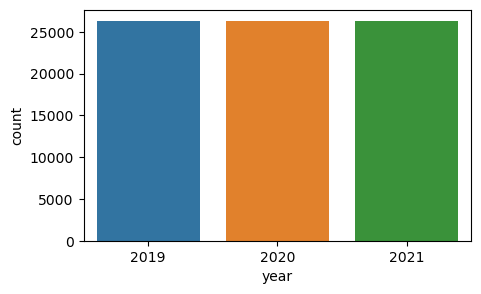

In [74]:
plt.figure(figsize= (5,3))
sns.countplot(x="year", data = train_data)
plt.show()

<Axes: xlabel='year', ylabel='emission'>

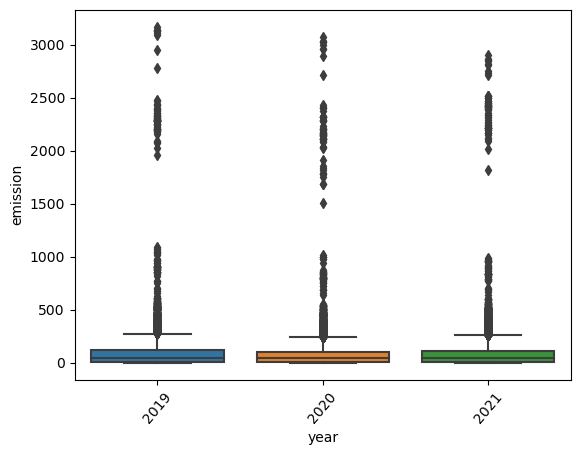

In [75]:
# Skip this as this plot is similar to the histogram below

plt.xticks(rotation = 50)
sns.boxplot(data=train_data, x = "year", y = "emission")

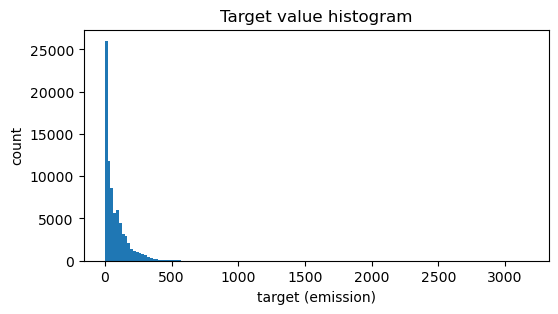

In [76]:
# Distribution of the Target Value

plt.figure(figsize=(6, 3))
plt.hist(train_data.emission, bins=150)
plt.title('Target value histogram')
plt.xlabel('target (emission)')
plt.ylabel('count')
plt.show()

### Data cleaning and preparation


### Approach 1 - Time Series


In [77]:
for index, column in enumerate(train_data.columns):
    print(f"{index:2}: {column}")

 0: latitude
 1: longitude
 2: year
 3: week_no
 4: SulphurDioxide_SO2_column_number_density
 5: SulphurDioxide_SO2_column_number_density_amf
 6: SulphurDioxide_SO2_slant_column_number_density
 7: SulphurDioxide_cloud_fraction
 8: SulphurDioxide_sensor_azimuth_angle
 9: SulphurDioxide_sensor_zenith_angle
10: SulphurDioxide_solar_azimuth_angle
11: SulphurDioxide_solar_zenith_angle
12: SulphurDioxide_SO2_column_number_density_15km
13: CarbonMonoxide_CO_column_number_density
14: CarbonMonoxide_H2O_column_number_density
15: CarbonMonoxide_cloud_height
16: CarbonMonoxide_sensor_altitude
17: CarbonMonoxide_sensor_azimuth_angle
18: CarbonMonoxide_sensor_zenith_angle
19: CarbonMonoxide_solar_azimuth_angle
20: CarbonMonoxide_solar_zenith_angle
21: NitrogenDioxide_NO2_column_number_density
22: NitrogenDioxide_tropospheric_NO2_column_number_density
23: NitrogenDioxide_stratospheric_NO2_column_number_density
24: NitrogenDioxide_NO2_slant_column_number_density
25: NitrogenDioxide_tropopause_pressur

In [78]:
train_data.head()

latitude  longitude  year  week_no  \
ID_LAT_LON_YEAR_WEEK                                           
ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

                          SulphurDioxide_SO2_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                 
ID_-0.510_29.290_2019_00                                 -0.000108   
ID_-0.510_29.290_2019_01                                  0.000021   
ID_-0.510_29.290_2019_02                                  0.000514   
ID_-0.510_29.290_2019_03                                       NaN   
ID_-0.510_29.290_2019_04                                 -0.000079   

                          SulphurDioxide_SO2_column_number_density_amf  \
ID_LAT_LON_YEAR_WEEK                                                     
ID_-0.510_29.290_2019_00                                      0.603019   
ID_-0.510_29.290_2019_01                                      0.728214   
ID_-0.510_29.290_2019_02                                      0.748199   
ID_-0.510_29.290_2019_03                                           NaN   
ID_-0.510_29.290_2019_04                                      0.676296   

                          SulphurDioxide_SO2_slant_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                       
ID_-0.510_29.290_2019_00                                       -0.000065   
ID_-0.510_29.290_2019_01                                        0.000014   
ID_-0.510_29.290_2019_02                                        0.000385   
ID_-0.510_29.290_2019_03                                             NaN   
ID_-0.510_29.290_2019_04                                       -0.000048   

                          SulphurDioxide_cloud_fraction  \
ID_LAT_LON_YEAR_WEEK                                      
ID_-0.510_29.290_2019_00                       0.255668   
ID_-0.510_29.290_2019_01                       0.130988   
ID_-0.510_29.290_2019_02                       0.110018   
ID_-0.510_29.290_2019_03                            NaN   
ID_-0.510_29.290_2019_04                       0.121164   

                          SulphurDioxide_sensor_azimuth_angle  \
ID_LAT_LON_YEAR_WEEK                                            
ID_-0.510_29.290_2019_00                           -98.593887   
ID_-0.510_29.290_2019_01                            16.592861   
ID_-0.510_29.290_2019_02                            72.795837   
ID_-0.510_29.290_2019_03                                  NaN   
ID_-0.510_29.290_2019_04                             4.121269   

                          SulphurDioxide_sensor_zenith_angle  ...  \
ID_LAT_LON_YEAR_WEEK                                          ...   
ID_-0.510_29.290_2019_00                           50.843559  ...   
ID_-0.510_29.290_2019_01                           39.137194  ...   
ID_-0.510_29.290_2019_02                           52.868816  ...   
ID_-0.510_29.290_2019_03                                 NaN  ...   
ID_-0.510_29.290_2019_04                           35.515587  ...   

                          Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
ID_LAT_LON_YEAR_WEEK                                                          
ID_-0.510_29.290_2019_00             3664.436218               61085.809570   
ID_-0.510_29.290_2019_01             3651.190311               66969.478735   
ID_-0.510_29.290_2019_02             4216.986492               60068.894448   
ID_-0.510_29.290_2019_03             5228.507736               51064.547339   
ID_-0.510_29.290_2019_04             3980.598120               63751.125781   

                          Cloud_cloud_base_height  Cloud_cloud_optical_depth  \
ID_LAT_LON_YEAR_WEEK                          

In [79]:
# df_v1 contains the Latitude and Longitude columns for EDA

# Selecting the columns to merge into a new DataFrame
df_v1 = train_data[['latitude', 'longitude']].copy()

# Convert columns to string and merge them
df_v1['LAT_LON'] = df_v1['latitude'].astype(str) + df_v1['longitude'].astype(str)

# Find Unique Values
unique_values = df_v1['LAT_LON'].unique()

# Print Length of the unique values
print(f' There are {len(unique_values)} unique coordinates from where we took the observation')

 There are 497 unique coordinates from where we took the observation


In [80]:
print(train_data.groupby(['latitude', 'longitude']).size().sort_values())
print('---------------------------')
print(test_data.groupby(['latitude', 'longitude']).size().sort_values())
print('---------------------------')
print(pd.concat([train_data, test_data], axis=0).groupby(['latitude', 'longitude']).size().sort_values())

latitude  longitude
-3.299    30.301       159
-1.444    30.856       159
-1.450    29.350       159
-1.482    30.618       159
-1.486    29.614       159
                      ... 
-2.293    29.507       159
-2.300    29.200       159
-2.301    29.899       159
-2.257    30.243       159
-0.510    29.290       159
Length: 497, dtype: int64
---------------------------
latitude  longitude
-3.299    30.301       49
-1.444    30.856       49
-1.450    29.350       49
-1.482    30.618       49
-1.486    29.614       49
                       ..
-2.293    29.507       49
-2.300    29.200       49
-2.301    29.899       49
-2.257    30.243       49
-0.510    29.290       49
Length: 497, dtype: int64
---------------------------
latitude  longitude
-3.299    30.301       208
-1.444    30.856       208
-1.450    29.350       208
-1.482    30.618       208
-1.486    29.614       208
                      ... 
-2.293    29.507       208
-2.300    29.200       208
-2.301    29.899       208
-2.257

For every geographical point, there are 159 rows with observations in train and 49 rows in test.
The 159 training rows correspond to three years (2019, 2020, 2021) with 53 weeks each (numbered from 0 to 52).
The 49 test rows correspond to weeks 0 to 48 of 2022.
497 * 3 * 53 = 79023, the size of the training dataset.
497 * 49 = 24353, the size of the test set.

In [81]:
# Taken from https://www.kaggle.com/code/inversion/getting-started-eda

train_coords = train_data.drop_duplicates(subset = ['latitude', 'longitude'])
geometry = gpd.points_from_xy(train_coords.longitude, train_coords.latitude)
geo_df = gpd.GeoDataFrame(
    train_coords[["latitude", "longitude"]], geometry=geometry
)

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each location
for coordinates in geo_df_list:

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color =  "red"),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

We need to handle missing data. As data is missing in train and test, we cannot simply drop rows with missing data, but need to impute the missing values.
As we are working with geographical data, measurements of nearby locations can be used for imputing missing values.
As the data is a time series, measurements of nearby points in time can be used for imputing missing values.

In [82]:
def rgba_to_hex(color):
    """Return color as #rrggbb for the given color values."""
    red, green, blue, alpha = color
    return f"#{int(red*255):02x}{int(green*255):02x}{int(blue*255):02x}"

temp = train_data.groupby(['latitude', 'longitude']).emission.mean().reset_index()
geometry = gpd.points_from_xy(temp.longitude, temp.latitude)

cmap = matplotlib.colormaps['coolwarm']
normalizer = matplotlib.colors.Normalize(vmin=np.log1p(temp.emission.min()), vmax=np.log1p(temp.emission.max()))

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geometry]

# Iterate through list and add a marker for each location
for coordinates, emission in zip(geo_df_list, temp.emission):
#     print(emission, normalizer(emission), rgba_to_hex(cmap(normalizer(emission))))
    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color = rgba_to_hex(cmap(normalizer(np.log1p(emission))))),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

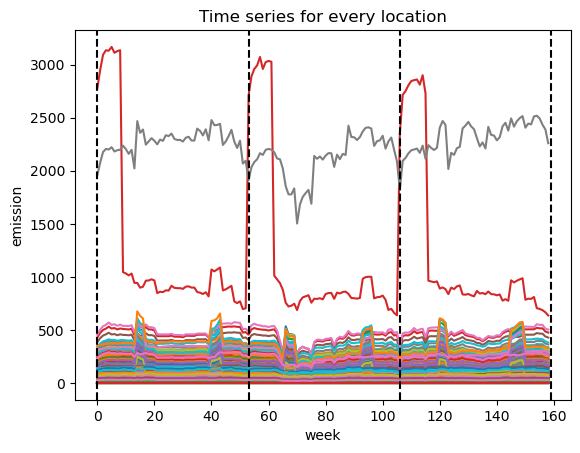

In [83]:
for ll in train_data[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = train_data[(train_data.latitude == ll[1].latitude) & (train_data.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 159]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

In [84]:
score_list = []
kf = LeaveOneGroupOut()
for fold, (idx_tr, idx_va) in enumerate(kf.split(train_data, groups=train_data.year)):
    X_tr = train_data.iloc[idx_tr][['longitude', 'latitude', 'week_no']]
    y_tr = train_data.iloc[idx_tr]['emission']
    X_va = train_data.iloc[idx_va][['longitude', 'latitude', 'week_no']]
    y_va = train_data.iloc[idx_va]['emission']

    model = RadiusNeighborsRegressor(radius=0) 
    model.fit(X_tr, y_tr)
    y_va_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_va_pred, squared=False)
    print(f"Fold {fold} year {train_data.iloc[idx_va].year.iloc[0]}: rmse = {rmse:.2f}")
    score_list.append(rmse)

rmse = sum(score_list) / len(score_list)
print(f"Overall RMSE: {rmse:.2f}")

Fold 0 year 2019: rmse = 20.29
Fold 1 year 2020: rmse = 27.14
Fold 2 year 2021: rmse = 19.77
Overall RMSE: 22.40


In [85]:
model = RadiusNeighborsRegressor(radius=0) 
model.fit(train_data[['longitude', 'latitude', 'week_no']], train_data.emission)
y_pred = model.predict(test_data[['longitude', 'latitude', 'week_no']])
submission_standard = pd.Series(y_pred, name='emission', index=test_data.index)
submission_standard.to_csv('submission_standard.csv')
submission_standard

ID_LAT_LON_YEAR_WEEK
ID_-0.510_29.290_2022_00     3.608051
ID_-0.510_29.290_2022_01     4.016319
ID_-0.510_29.290_2022_02     4.138755
ID_-0.510_29.290_2022_03     4.184737
ID_-0.510_29.290_2022_04     4.247569
                              ...    
ID_-3.299_30.301_2022_44    28.725407
ID_-3.299_30.301_2022_45    29.048892
ID_-3.299_30.301_2022_46    29.252211
ID_-3.299_30.301_2022_47    29.794027
ID_-3.299_30.301_2022_48    28.759248
Name: emission, Length: 24353, dtype: float64

### Approach 2 - Feature selection and Evaluation Approach

There are 7 features we need to compare with the outcome.

* Sulphur Dioxide

* Carbon Monoxide

* Nitrogen Dioxide

* Formaldehyde

* UV Aerosol Index

* Ozone

* Cloud

In [87]:
features = ["Sulfur Dioxide","Carbon Monoxide","Nitrogen Dioxide","Formaldehyde","Aerosol Content"]

In [93]:
num_rows = train_data.shape[0]
percentage_missing =train_data.isnull().sum()
missing_percent = percentage_missing.reset_index()
missing_percent


missing_percent.columns = ["features", "percent"]
missing_percent['percent'] = missing_percent["percent"].apply(lambda x:( x / len(train_data)) * 100)
missing_percent

features    percent
0                                   latitude   0.000000
1                                  longitude   0.000000
2                                       year   0.000000
3                                    week_no   0.000000
4   SulphurDioxide_SO2_column_number_density  18.487023
..                                       ...        ...
70                Cloud_sensor_azimuth_angle   0.612480
71                 Cloud_sensor_zenith_angle   0.612480
72                 Cloud_solar_azimuth_angle   0.612480
73                  Cloud_solar_zenith_angle   0.612480
74                                  emission   0.000000

[75 rows x 2 columns]

Drop features with over 40% of data missing

In [94]:

data_less_40 = missing_percent.loc[missing_percent['percent'] < 40]

In [95]:
data_less_40

features    percent
0                                   latitude   0.000000
1                                  longitude   0.000000
2                                       year   0.000000
3                                    week_no   0.000000
4   SulphurDioxide_SO2_column_number_density  18.487023
..                                       ...        ...
70                Cloud_sensor_azimuth_angle   0.612480
71                 Cloud_sensor_zenith_angle   0.612480
72                 Cloud_solar_azimuth_angle   0.612480
73                  Cloud_solar_zenith_angle   0.612480
74                                  emission   0.000000

[68 rows x 2 columns]

In [96]:
data_less_40['features'].tolist()

['latitude',
 'longitude',
 'year',
 'week_no',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure'

Find the subfeature with the highest correlation with Dependent - column
- 'SulphurDioxide_sensor_azimuth_angle'
- 'CarbonMonoxide_H2O_column_number_density'
- 'NitrogenDioxide_sensor_altitude'
- 'Formaldehyde_tropospheric_HCHO_column_number_density_amf'
- 'UvAerosolIndex_solar_azimuth_angle',
- 'Ozone_solar_azimuth_angle',
- 'Cloud_solar_azimuth_angle',


<Axes: >

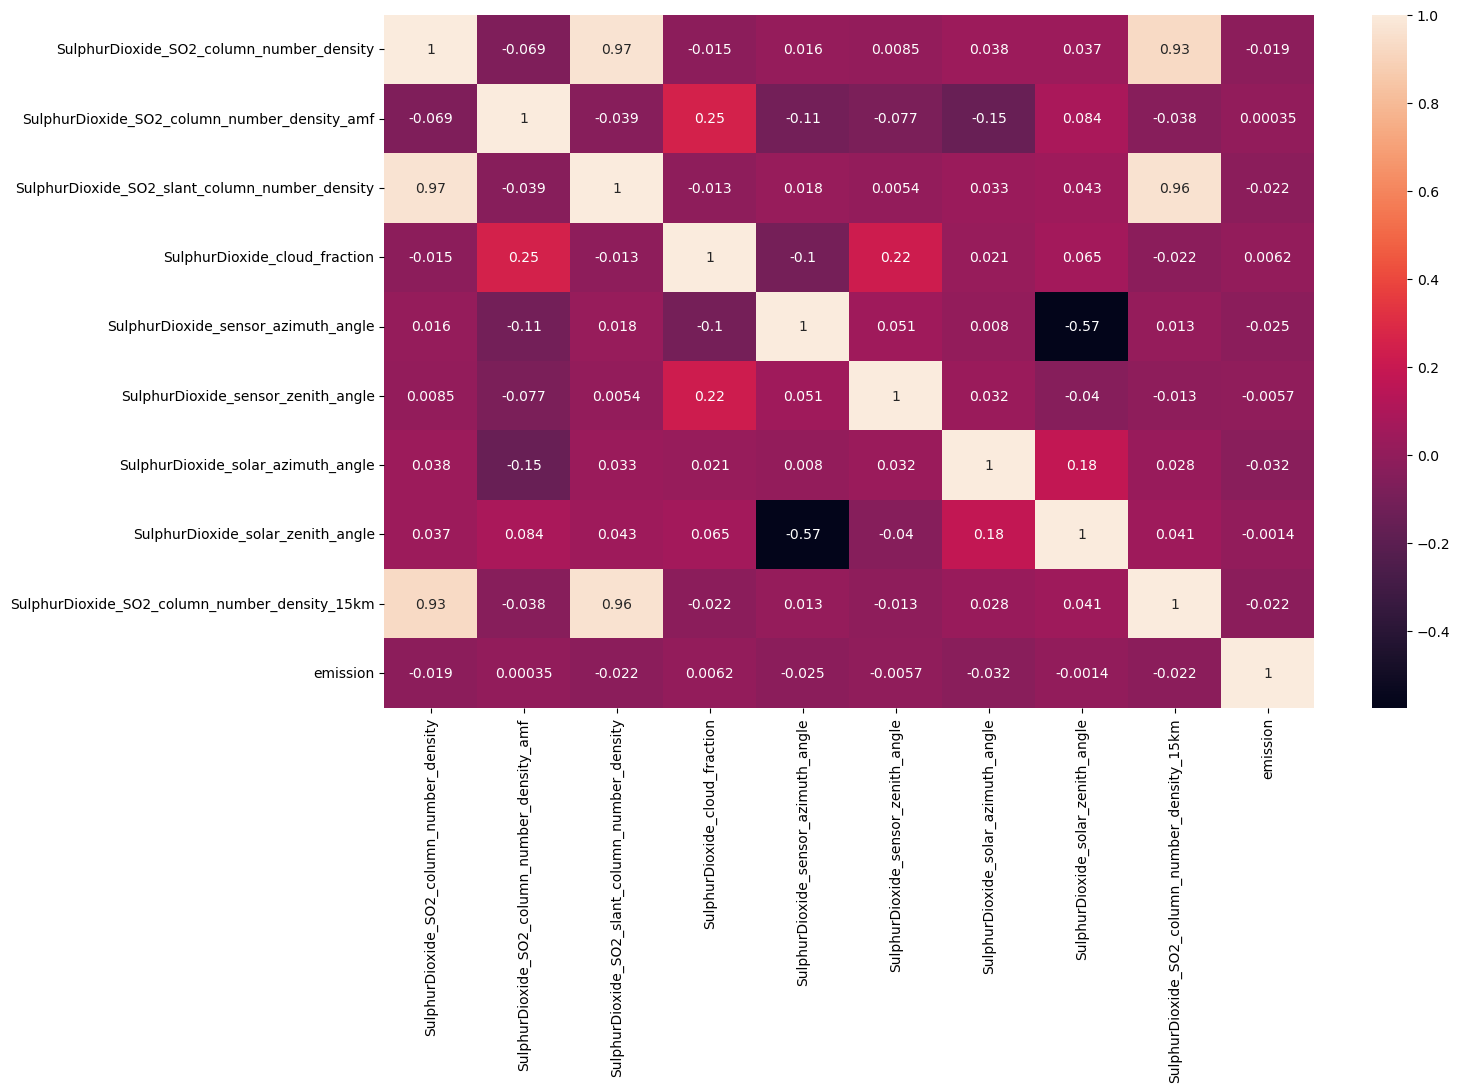

In [98]:
plt.figure(figsize=(15,9))
sns.heatmap(train_data[['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km','emission']].corr(), annot=True)

<Axes: >

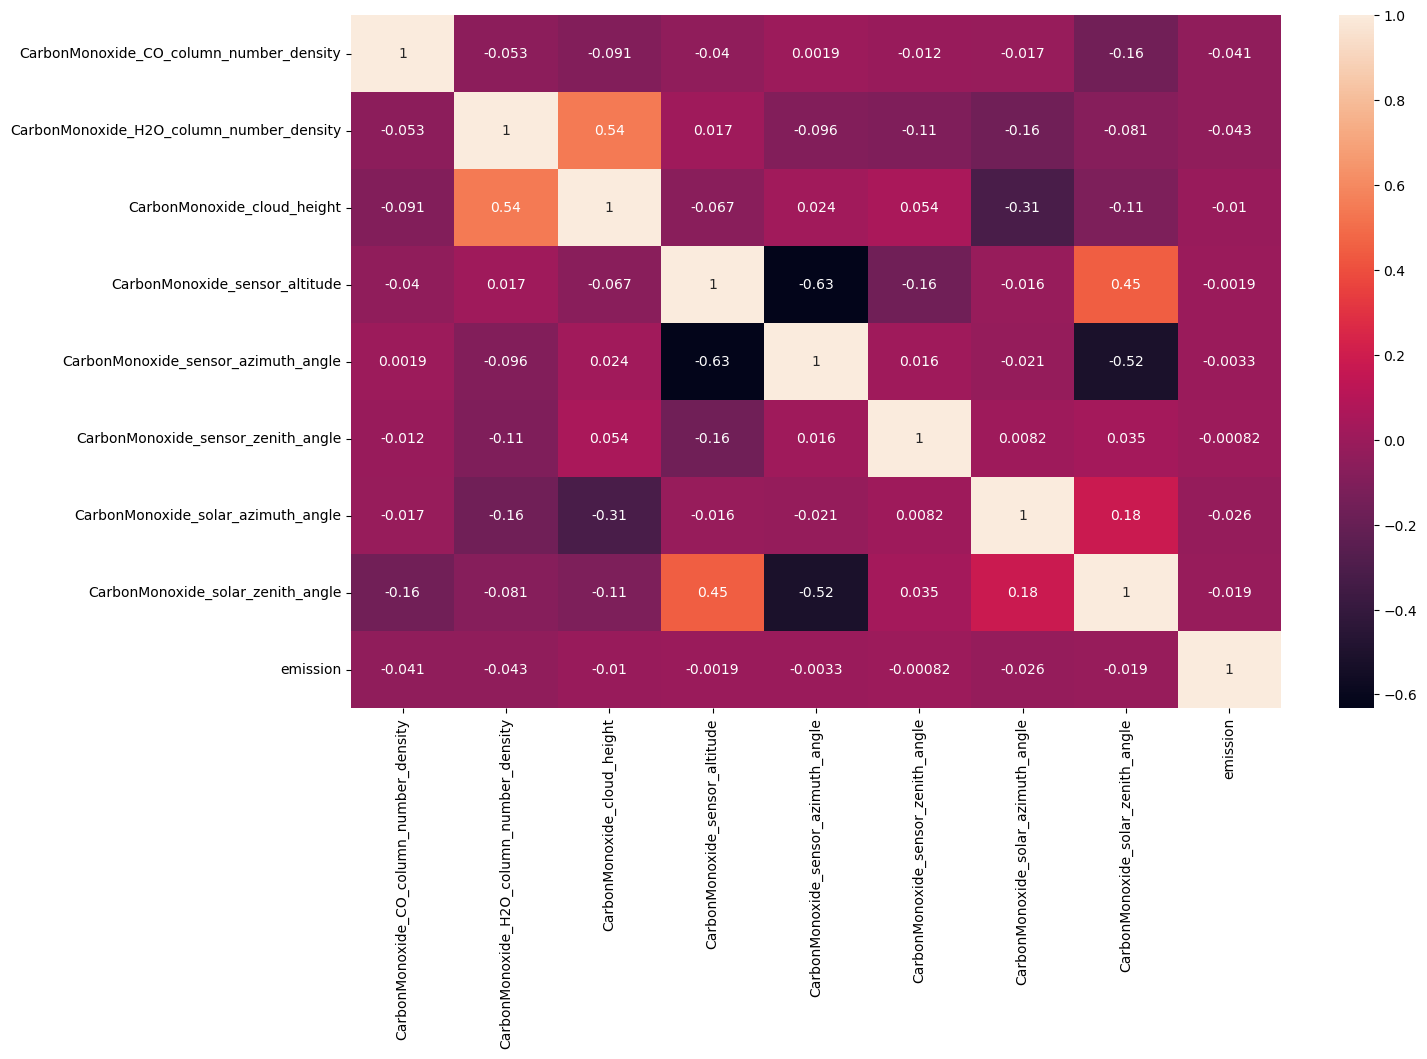

In [99]:
plt.figure(figsize=(15,9))
sns.heatmap(train_data[['CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

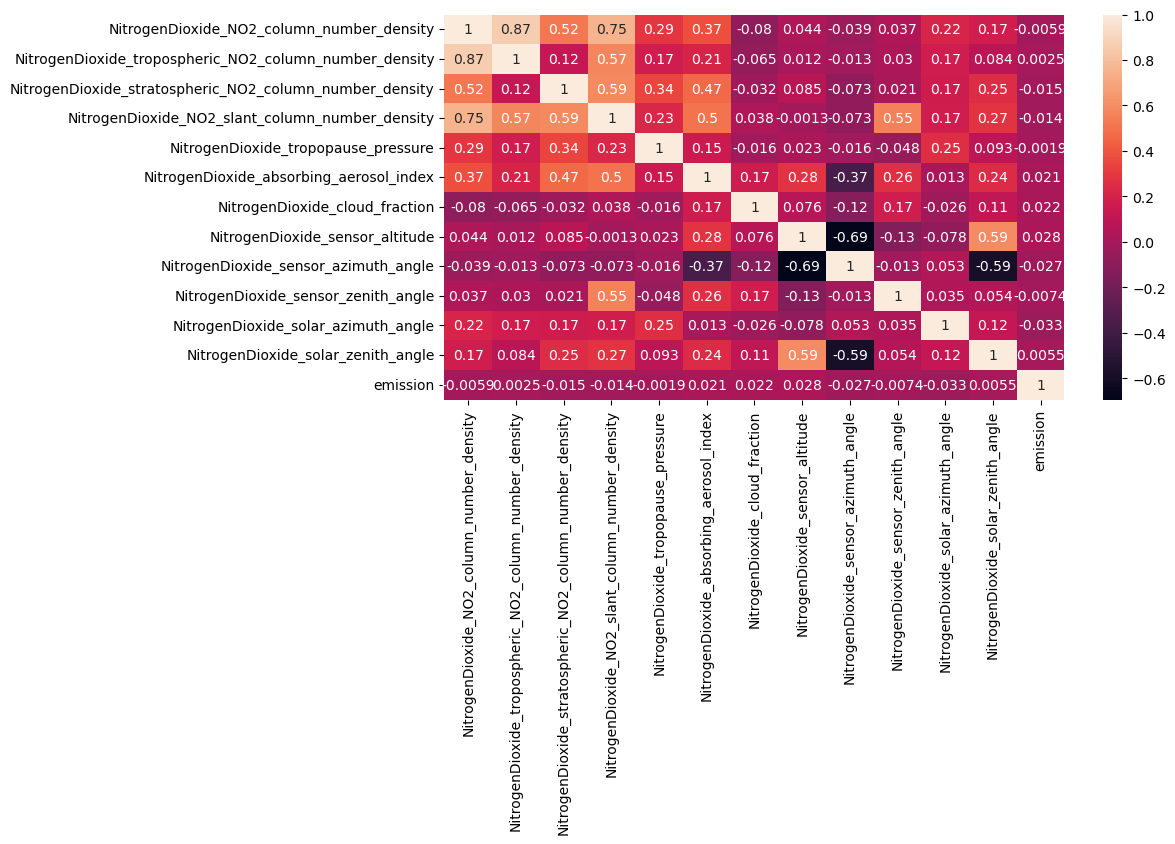

In [100]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data[['NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aerosol_index',
 'NitrogenDioxide_cloud_fraction',
 'NitrogenDioxide_sensor_altitude',
 'NitrogenDioxide_sensor_azimuth_angle',
 'NitrogenDioxide_sensor_zenith_angle',
 'NitrogenDioxide_solar_azimuth_angle',
 'NitrogenDioxide_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

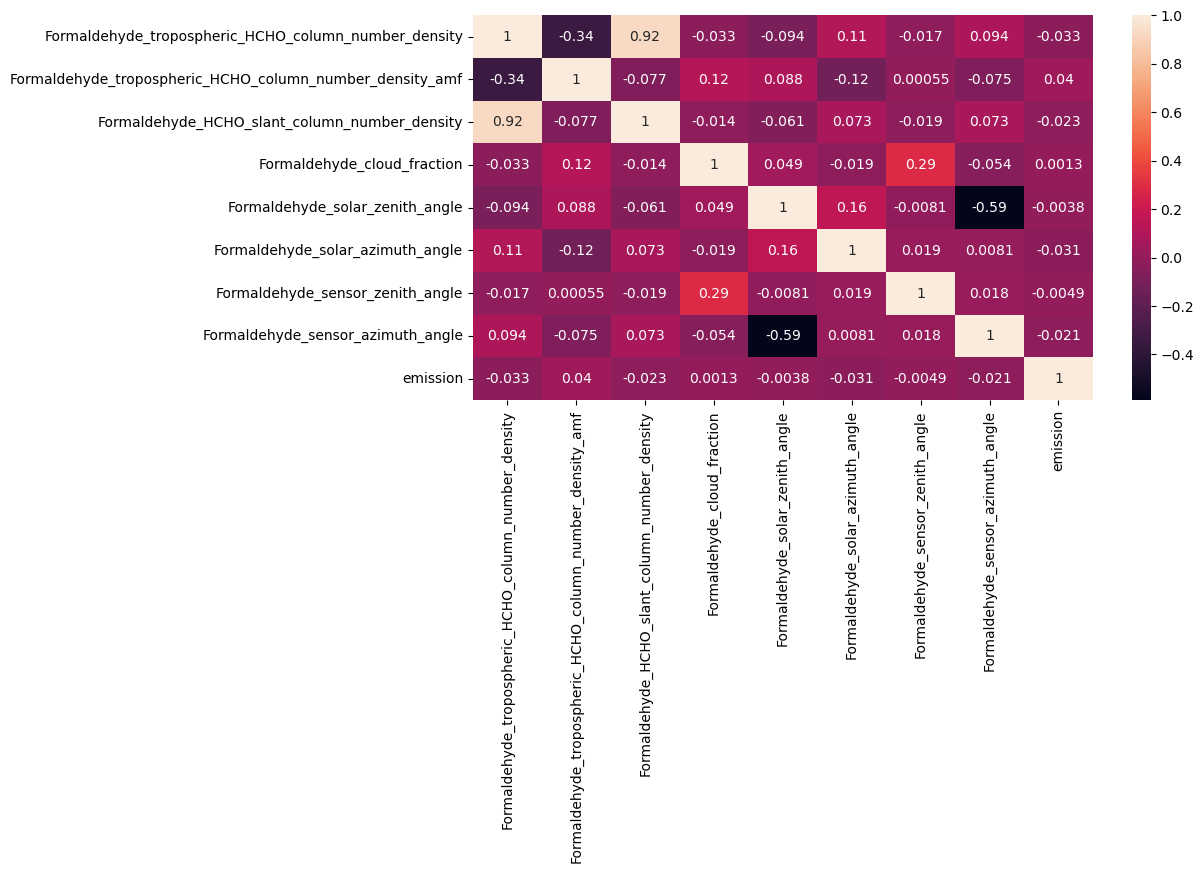

In [101]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data[['Formaldehyde_tropospheric_HCHO_column_number_density',
 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
 'Formaldehyde_HCHO_slant_column_number_density',
 'Formaldehyde_cloud_fraction',
 'Formaldehyde_solar_zenith_angle',
 'Formaldehyde_solar_azimuth_angle',
 'Formaldehyde_sensor_zenith_angle',
 'Formaldehyde_sensor_azimuth_angle','emission']].corr(), annot=True)

<Axes: >

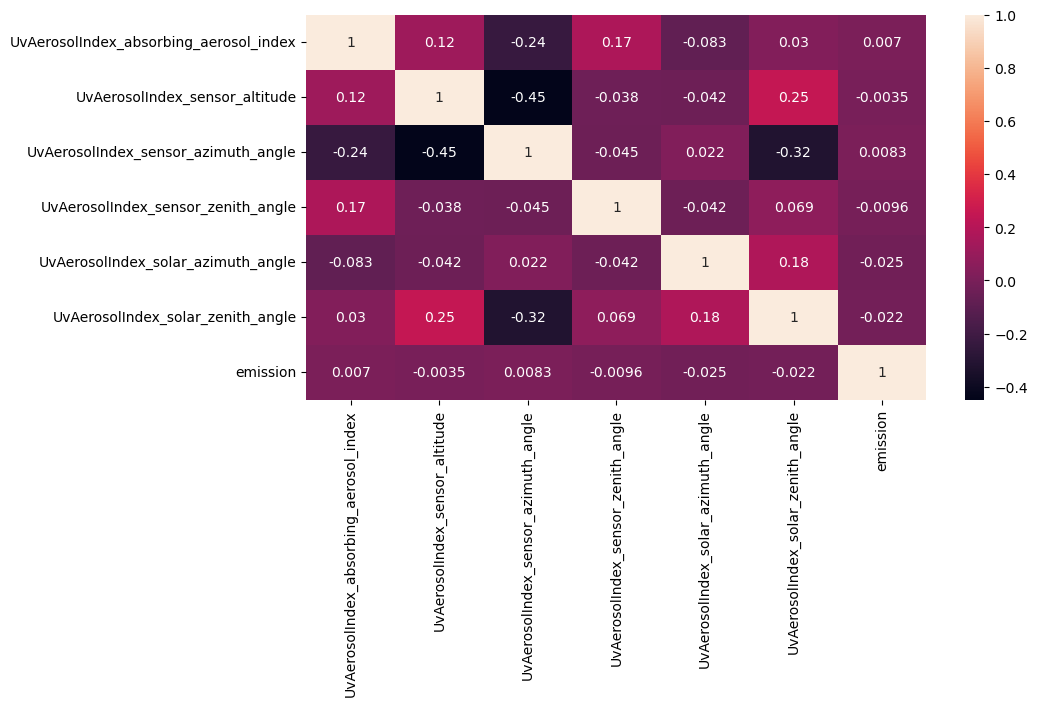

In [102]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data[['UvAerosolIndex_absorbing_aerosol_index',
 'UvAerosolIndex_sensor_altitude',
 'UvAerosolIndex_sensor_azimuth_angle',
 'UvAerosolIndex_sensor_zenith_angle',
 'UvAerosolIndex_solar_azimuth_angle',
 'UvAerosolIndex_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

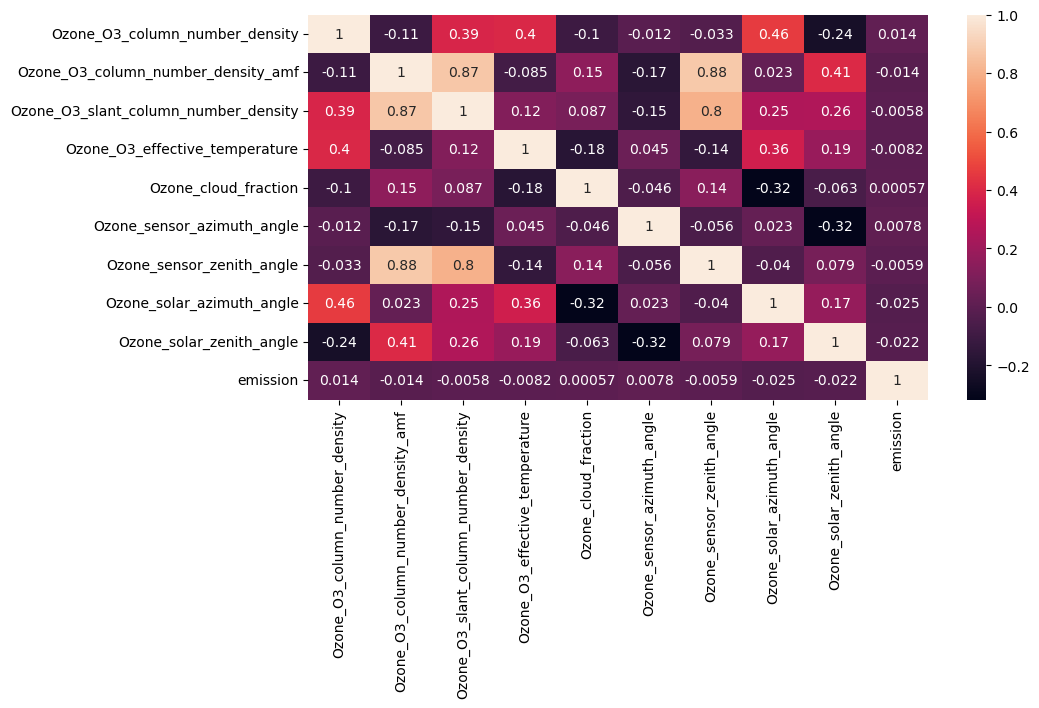

In [103]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data[['Ozone_O3_column_number_density',
 'Ozone_O3_column_number_density_amf',
 'Ozone_O3_slant_column_number_density',
 'Ozone_O3_effective_temperature',
 'Ozone_cloud_fraction',
 'Ozone_sensor_azimuth_angle',
 'Ozone_sensor_zenith_angle',
 'Ozone_solar_azimuth_angle',
 'Ozone_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

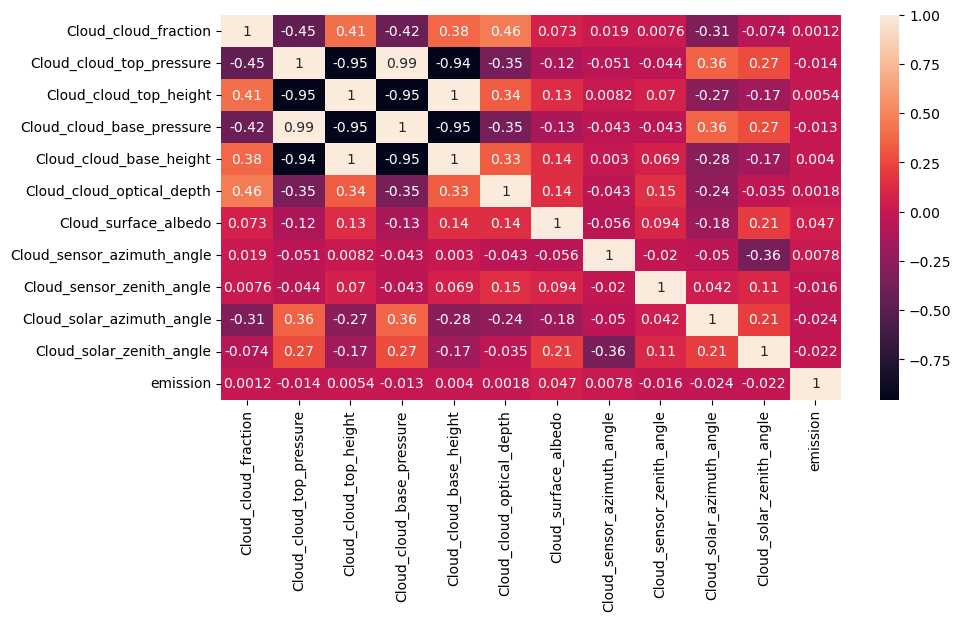

In [104]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Cloud_cloud_fraction',
 'Cloud_cloud_top_pressure',
 'Cloud_cloud_top_height',
 'Cloud_cloud_base_pressure',
 'Cloud_cloud_base_height',
 'Cloud_cloud_optical_depth',
 'Cloud_surface_albedo',
 'Cloud_sensor_azimuth_angle',
 'Cloud_sensor_zenith_angle',
 'Cloud_solar_azimuth_angle',
 'Cloud_solar_zenith_angle','emission']].corr(), annot=True)

In [105]:
f_feat = ['latitude','longitude','year','week_no','SulphurDioxide_sensor_azimuth_angle','CarbonMonoxide_H2O_column_number_density','NitrogenDioxide_sensor_altitude',
          'Formaldehyde_tropospheric_HCHO_column_number_density_amf','UvAerosolIndex_solar_azimuth_angle','Ozone_solar_azimuth_angle','Cloud_solar_azimuth_angle','emission']

confirm missing values percentages

In [106]:
(train_data[f_feat].isnull().sum() / len(train_data) )* 100

latitude                                                     0.000000
longitude                                                    0.000000
year                                                         0.000000
week_no                                                      0.000000
SulphurDioxide_sensor_azimuth_angle                         18.487023
CarbonMonoxide_H2O_column_number_density                     2.685294
NitrogenDioxide_sensor_altitude                             23.183124
Formaldehyde_tropospheric_HCHO_column_number_density_amf     9.208711
UvAerosolIndex_solar_azimuth_angle                           0.682080
Ozone_solar_azimuth_angle                                    0.693469
Cloud_solar_azimuth_angle                                    0.612480
emission                                                     0.000000
dtype: float64

In [107]:
co2 = train_data.loc[:,f_feat]

In [108]:
mv = [col for col in co2.columns if co2[col].isnull().sum() > 0]

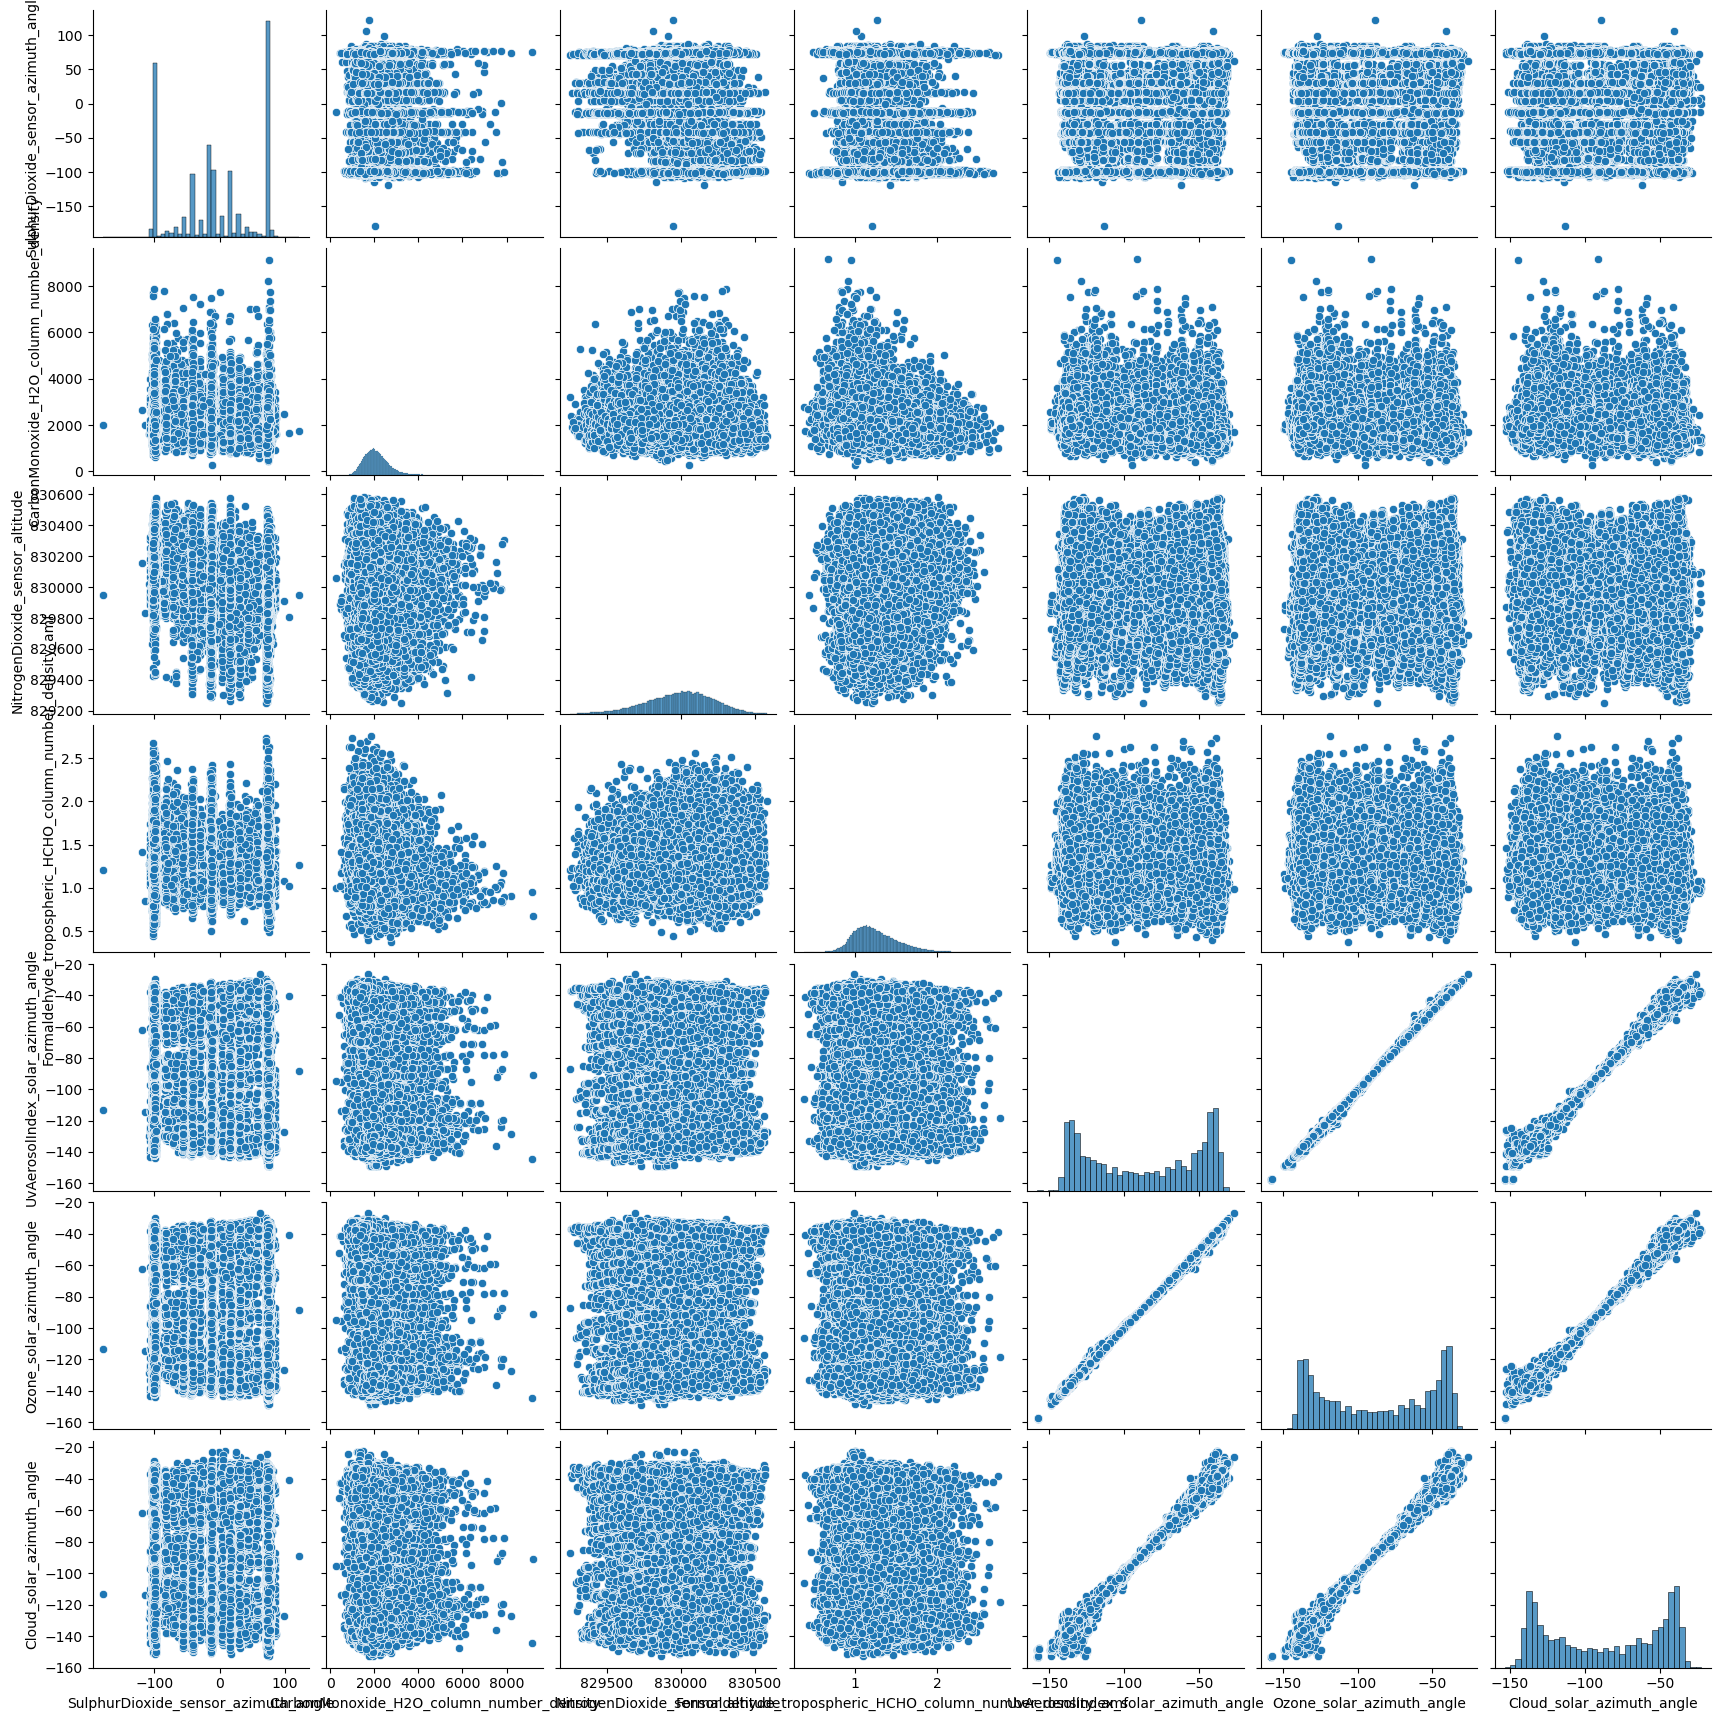

In [109]:
sns.pairplot(co2[mv])

The first four missing columns have a normal distribution, therefore they can be replaced by the mean values

<Axes: >

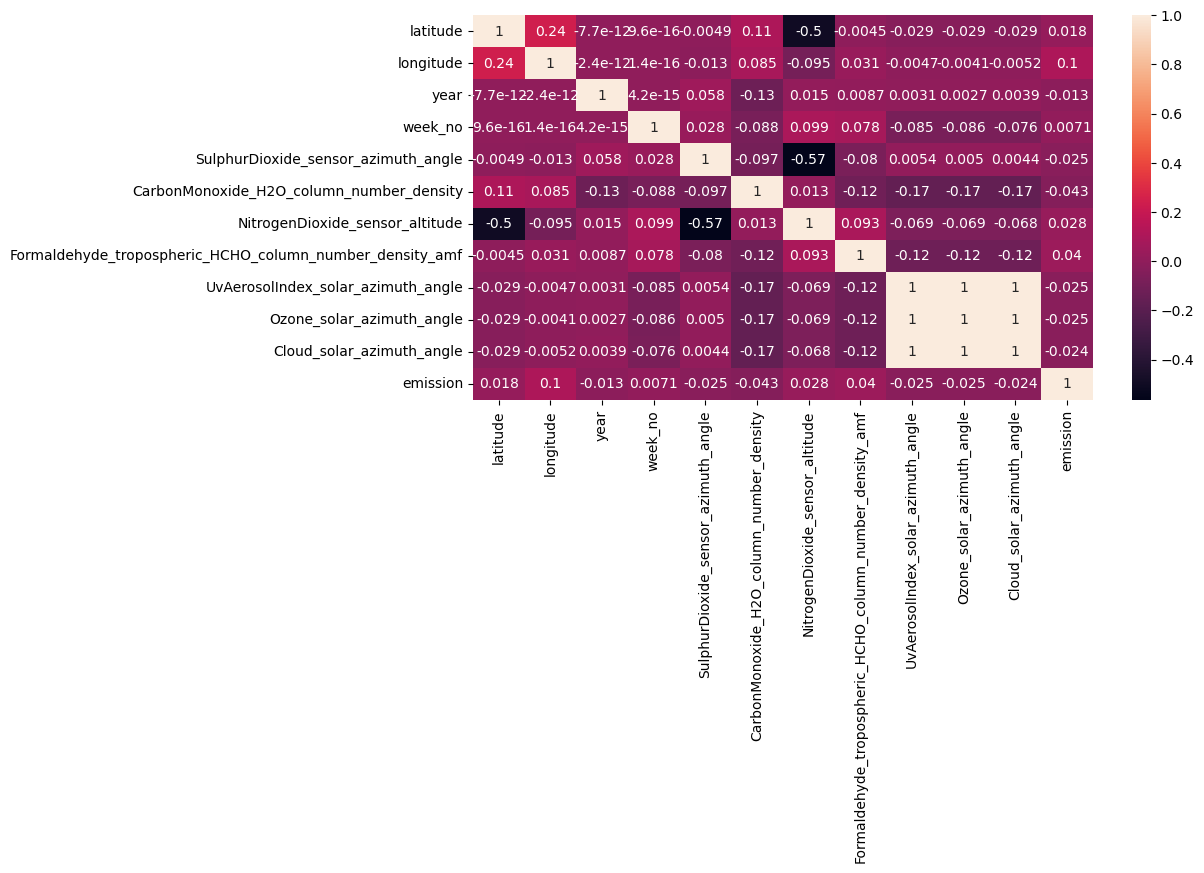

In [110]:
plt.figure(figsize=(10,5))
sns.heatmap(co2.corr(), annot=True)

In [111]:
co2.drop(['Ozone_solar_azimuth_angle','Cloud_solar_azimuth_angle'], axis=1,inplace=True)

In [112]:
co2.head()

latitude  longitude  year  week_no  \
ID_LAT_LON_YEAR_WEEK                                           
ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

                          SulphurDioxide_sensor_azimuth_angle  \
ID_LAT_LON_YEAR_WEEK                                            
ID_-0.510_29.290_2019_00                           -98.593887   
ID_-0.510_29.290_2019_01                            16.592861   
ID_-0.510_29.290_2019_02                            72.795837   
ID_-0.510_29.290_2019_03                                  NaN   
ID_-0.510_29.290_2019_04                             4.121269   

                          CarbonMonoxide_H2O_column_number_density  \
ID_LAT_LON_YEAR_WEEK                                                 
ID_-0.510_29.290_2019_00                               1589.024536   
ID_-0.510_29.290_2019_01                               1772.574405   
ID_-0.510_29.290_2019_02                               2703.236800   
ID_-0.510_29.290_2019_03                               2076.073332   
ID_-0.510_29.290_2019_04                               2053.608490   

                          NitrogenDioxide_sensor_altitude  \
ID_LAT_LON_YEAR_WEEK                                        
ID_-0.510_29.290_2019_00                              NaN   
ID_-0.510_29.290_2019_01                    829859.960368   
ID_-0.510_29.290_2019_02                    829527.125000   
ID_-0.510_29.290_2019_03                              NaN   
ID_-0.510_29.290_2019_04                    829744.843750   

                          Formaldehyde_tropospheric_HCHO_column_number_density_amf  \
ID_LAT_LON_YEAR_WEEK                                                                 
ID_-0.510_29.290_2019_00                                           0.863230          
ID_-0.510_29.290_2019_01                                           1.172826          
ID_-0.510_29.290_2019_02                                           1.175467          
ID_-0.510_29.290_2019_03                                                NaN          
ID_-0.510_29.290_2019_04                                           0.869081          

                          UvAerosolIndex_solar_azimuth_angle  emission  
ID_LAT_LON_YEAR_WEEK                                                    
ID_-0.510_29.290_2019_00                         -138.786446  3.750994  
ID_-0.510_29.290_2019_01                         -142.786141  4.025176  
ID_-0.510_29.290_2019_02                         -135.364627  4.231381  
ID_-0.510_29.290_2019_03                         -137.489602  4.305286  
ID_-0.510_29.290_2019_04                         -136.448518  4.347317

In [113]:
co2.columns = ['latitude','longitude','year','week_no','sulphur_dioxide','carbon_monoxide','nitrogen_dioxide','formaldehyde','uv_aerosol_index','emission']

In [114]:
co2.head()

latitude  longitude  year  week_no  sulphur_dioxide  \
ID_LAT_LON_YEAR_WEEK                                                            
ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0       -98.593887   
ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1        16.592861   
ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2        72.795837   
ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3              NaN   
ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4         4.121269   

                          carbon_monoxide  nitrogen_dioxide  formaldehyde  \
ID_LAT_LON_YEAR_WEEK                                                        
ID_-0.510_29.290_2019_00      1589.024536               NaN      0.863230   
ID_-0.510_29.290_2019_01      1772.574405     829859.960368      1.172826   
ID_-0.510_29.290_2019_02      2703.236800     829527.125000      1.175467   
ID_-0.510_29.290_2019_03      2076.073332               NaN           NaN   
ID_-0.510_29.290_2019_04      2053.608490     829744.843750      0.869081   

                          uv_aerosol_index  emission  
ID_LAT_LON_YEAR_WEEK                                  
ID_-0.510_29.290_2019_00       -138.786446  3.750994  
ID_-0.510_29.290_2019_01       -142.786141  4.025176  
ID_-0.510_29.290_2019_02       -135.364627  4.231381  
ID_-0.510_29.290_2019_03       -137.489602  4.305286  
ID_-0.510_29.290_2019_04       -136.448518  4.347317

In [115]:
co2['sulphur_dioxide'].fillna(np.mean(co2['sulphur_dioxide']),inplace=True)
co2['carbon_monoxide'].fillna(np.mean(co2['carbon_monoxide']),inplace=True)
co2['nitrogen_dioxide'].fillna(np.mean(co2['nitrogen_dioxide']),inplace=True)
co2['formaldehyde'].fillna(np.mean(co2['formaldehyde']),inplace=True)

In [116]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          79023 non-null  float64
 1   longitude         79023 non-null  float64
 2   year              79023 non-null  int64  
 3   week_no           79023 non-null  int64  
 4   sulphur_dioxide   79023 non-null  float64
 5   carbon_monoxide   79023 non-null  float64
 6   nitrogen_dioxide  79023 non-null  float64
 7   formaldehyde      79023 non-null  float64
 8   uv_aerosol_index  78484 non-null  float64
 9   emission          79023 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 8.6+ MB


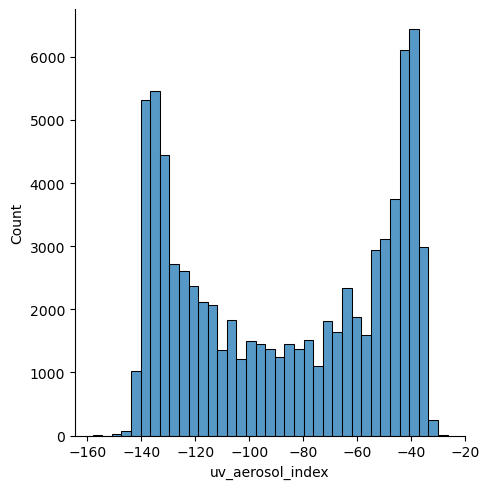

In [117]:
sns.displot(data=co2,x='uv_aerosol_index')

In [118]:
uv_median = co2['uv_aerosol_index'].median()

In [119]:
co2['uv_aerosol_index'].fillna(uv_median,inplace=True)

In [120]:
# Check for any duplicates
co2.duplicated().any()

False

In [121]:
#confirming the missing values
co2.isnull().sum()

latitude            0
longitude           0
year                0
week_no             0
sulphur_dioxide     0
carbon_monoxide     0
nitrogen_dioxide    0
formaldehyde        0
uv_aerosol_index    0
emission            0
dtype: int64

<Axes: >

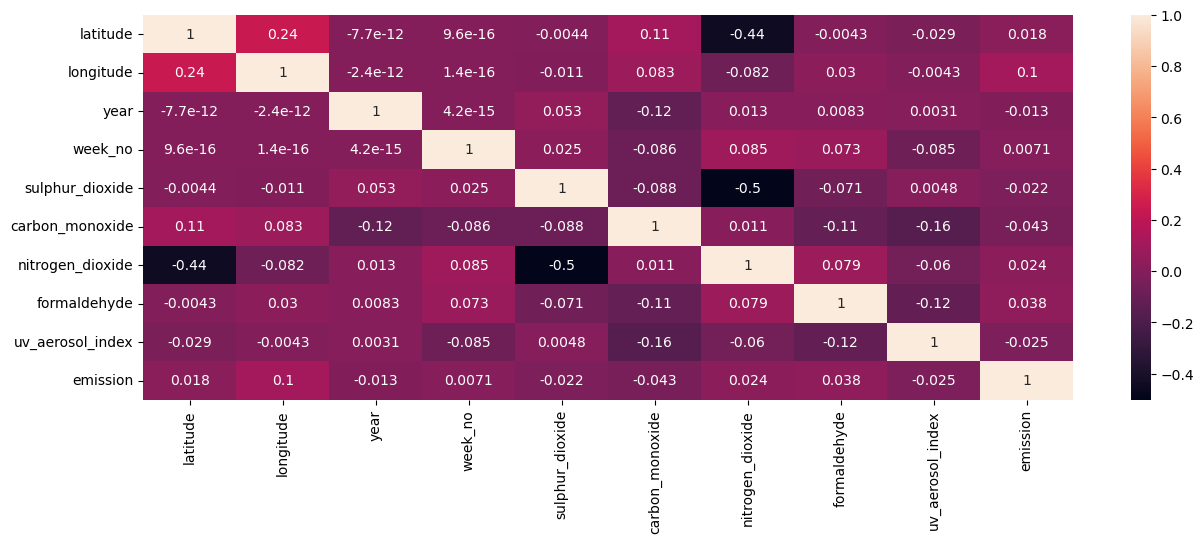

In [122]:
plt.figure(figsize=(15,5))
sns.heatmap(co2.corr(),annot=True)

In [123]:
X = co2.iloc[:, :-1]
Y = co2.iloc[:,-1]
print(X.head(), Y[:5])

                          latitude  longitude  year  week_no  sulphur_dioxide  \
ID_LAT_LON_YEAR_WEEK                                                            
ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0       -98.593887   
ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1        16.592861   
ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2        72.795837   
ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3        -7.925870   
ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4         4.121269   

                          carbon_monoxide  nitrogen_dioxide  formaldehyde  \
ID_LAT_LON_YEAR_WEEK                                                        
ID_-0.510_29.290_2019_00      1589.024536     829994.224471      0.863230   
ID_-0.510_29.290_2019_01      1772.574405     829859.960368      1.172826   
ID_-0.510_29.290_2019_02      2703.236800     829527.125000      1.175467   
ID_-0.510_29.290_2019_03      2076.073332     8

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,random_state=44)

In [128]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mse,rmse,r2_square

In [129]:
# train multiple models
models = {
    'Decision Tree':DecisionTreeRegressor(),
    'Lasso': Lasso(),
    'Linear Regression': LinearRegression(),
    'RandomForest':RandomForestRegressor(),
    'SVR': SVR()

}

model_list = []
r2_list = []
adjusted_r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # make predictions
    y_pred = model.predict(X_test)

    mse,rmse,r2_square = evaluate_model(y_test,y_pred)
    Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model training Performance')
    print("Mean Squared Error:",mse)
    print("Root Mean Square Error:",rmse)
    print('R2 Score',r2_square*100)
    print('Adjusted R2 Score',Adj_r2*100)

    r2_list.append(r2_square)
    adjusted_r2_list.append(Adj_r2)
    
    print('='*35)
    print('\n')

Decision Tree
Model training Performance
Mean Squared Error: 446.2940506013852
Root Mean Square Error: 21.125672784585706
R2 Score 97.89239631691515
Adjusted R2 Score 97.89205334448634


Lasso
Model training Performance
Mean Squared Error: 20865.009493270758
Root Mean Square Error: 144.4472550561995
R2 Score 1.46592634080428
Adjusted R2 Score 1.4498917936858313


Linear Regression
Model training Performance
Mean Squared Error: 20856.689741306218
Root Mean Square Error: 144.41845360377675
R2 Score 1.5052159971624235
Adjusted R2 Score 1.4891878436885664


RandomForest
Model training Performance
Mean Squared Error: 329.54675264882263
Root Mean Square Error: 18.153422615276234
R2 Score 98.44373020725821
Adjusted R2 Score 98.44347695393787


SVR
Model training Performance
Mean Squared Error: 22519.658143279215
Root Mean Square Error: 150.06551283782431
R2 Score -6.3480778662201365
Adjusted R2 Score -6.365383993960272


